In [1]:
import cv2
import os
import time
from matplotlib import pyplot as plt

In [53]:
def hybridModel(test_image):
    classifierFace = cv2.CascadeClassifier("classifiers\\haar\\haarcascade_frontalface_default.xml")
    fisherface = cv2.face.FisherFaceRecognizer_create(num_components=50, threshold=1)
    fisherface.read("classifiers\\classifierFisherface.yml")
    lpbhface = cv2.face.LBPHFaceRecognizer_create()
    lpbhface.read("classifiers\\classifierlbphface.yml")
    height, width = 220, 220
#     webcam = cv2.VideoCapture(0, cv2.CAP_DSHOW)

#     while True:
#         isConnected, image = webcam.read()

#         if isConnected:
    imageConverted = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    faceDetected = classifierFace.detectMultiScale(imageConverted, scaleFactor=1.5, minSize=(30, 30))

    for (x, y, w, h) in faceDetected:
        start_time = time.time()
        faceImage = cv2.resize(imageConverted[y:y + h, x:x + w], (width, height))
        faceId, accuracy = fisherface.predict(faceImage)
        faceId1, accuracy1 = lpbhface.predict(faceImage)
        t = time.time()-start_time
        print("--- %s seconds ---" % (time.time() - start_time))
        faceName = ''

        if faceId == 1 and faceId1 == 1:
            color = (0, 255, 51)
            faceName = 'Nishanth'
        elif faceId == 2 and faceId1 == 2 :
            color = (0, 0, 255)
            faceName = 'Bala'
        else:
            color = (0, 0, 255)
            faceName = 'UNKNOWN'
        print(faceName)
        cv2.rectangle(test_image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(test_image, f'ID: {faceId}', (x, y + (h + 30)), cv2.FONT_HERSHEY_PLAIN, 1, color)
        cv2.putText(test_image, f'NAME: {faceName}', (x, y + (h + 50)), cv2.FONT_HERSHEY_PLAIN, 1, color)
        cv2.putText(test_image, f'ACCURACY: {accuracy}', (x, y + (h + 70)), cv2.FONT_HERSHEY_PLAIN, 1, color)

#         cv2.imshow("FACE", test_image)
#         if cv2.waitKey(1) == ord('q'):
#             break
        if faceName == '' or faceName == None:
                faceName = 'Unknown'
        return [faceName , t]

In [32]:
cd D:\Phase 2\hybrid

D:\Phase 2\hybrid


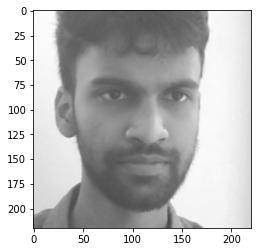

In [37]:
image1 = cv2.imread("D:/Phase 2/hybrid/images/samples/Bala.2.2.jpg")
plt.imshow(image1)
plt.show()

In [38]:
[name , t] = hybridModel(image1)
print(name)
print(t)

--- 0.010997533798217773 seconds ---
UNKNOWN
UNKNOWN
0.010997533798217773


In [14]:
import cv2
import os
import numpy

# CLASSIFIERS
eigenface = cv2.face.EigenFaceRecognizer_create(num_components=50)
fisherface = cv2.face.FisherFaceRecognizer_create()
face_recognizer = cv2.face.LBPHFaceRecognizer_create()


print('STARTING TRAINING!')

def getImageId():
    paths = [os.path.join('D:\\Phase 2\\hybrid\\images\\samples', i) for i in os.listdir('images\\samples')]
    faces = []
    ids = []

    for pathImage in paths:
        print(pathImage)
        imageFace = cv2.imread(pathImage)
        imageConverted = cv2.cvtColor(imageFace, cv2.COLOR_BGR2GRAY)
        ids.append(int(os.path.split(pathImage)[-1].split('.')[1]))
        faces.append(imageConverted)
    return numpy.array(ids), faces

ids, faces = getImageId()


fisherface.train(faces, ids)
face_recognizer.train(faces, ids)
fisherface.write('classifiers\\classifierFisherface.yml')
face_recognizer.write('classifiers\\classifierlbphface.yml')
print('SUCCESSFUL TRAINING!')

STARTING TRAINING!
D:\Phase 2\hybrid\images\samples\Bala.2.1.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.10.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.11.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.12.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.13.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.14.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.15.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.16.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.17.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.18.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.19.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.2.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.20.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.21.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.22.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.23.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.24.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.3.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.4.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.5.jpg
D:\Phase 2\hybrid\images\samples\Bala.2.6.jpg


In [5]:
pwd


'D:\\Phase 2\\hybrid'

In [55]:
test_nish = os.listdir('D:/Phase 2/hybrid/images/test/Nishanth')
test_unknown = os.listdir('D:/Phase 2/hybrid/images/test/Unknown')

In [56]:
test_nish


['Bala.2.14.jpg',
 'Bala.2.16.jpg',
 'Bala.2.17.jpg',
 'Bala.2.5.jpg',
 'Bala.2.6.jpg',
 'Nishanth.1.1.jpg',
 'Nishanth.1.12.jpg',
 'Nishanth.1.16 - Copy.jpg',
 'Nishanth.1.17.jpg',
 'Nishanth.1.18 - Copy.jpg',
 'Nishanth.1.21.jpg',
 'Nishanth.1.22.jpg',
 'Nishanth.1.23.jpg',
 'Nishanth.1.4 - Copy.jpg',
 'Nishanth.1.5.jpg',
 'Nishanth.1.7.jpg',
 'Nishanth.1.8.jpg',
 'Nishanth.1.9.jpg']

In [57]:
test_unknown

['18L141_Ravivarma.jpg',
 '2.jpg',
 'Habi.jpg',
 'Sekar.4.11 - Copy.jpg',
 'Sekar.4.24 - Copy.jpg',
 'vignesh.3.23 - Copy.jpg',
 'vignesh.3.24 - Copy.jpg',
 'vignesh.3.7 - Copy.jpg']

In [58]:
correct_predictions = 0
ti = 0

for file in test_nish:
    s = 'D:/Phase 2/hybrid/images/test/Nishanth/'+file
    print(s)
    img = cv2.imread(s)
    
    [res,t] =  hybridModel(img)
    ti += t
    print(res)
    if(res == "Nishanth" or res == 'Bala'):
        correct_predictions+=1

D:/Phase 2/hybrid/images/test/Nishanth/Bala.2.14.jpg
--- 0.013993501663208008 seconds ---
Bala
Bala
D:/Phase 2/hybrid/images/test/Nishanth/Bala.2.16.jpg
--- 0.0179903507232666 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Nishanth/Bala.2.17.jpg
--- 0.010994434356689453 seconds ---
Bala
Bala
D:/Phase 2/hybrid/images/test/Nishanth/Bala.2.5.jpg
--- 0.010995149612426758 seconds ---
Bala
Bala
D:/Phase 2/hybrid/images/test/Nishanth/Bala.2.6.jpg
--- 0.015992403030395508 seconds ---
Bala
Bala
D:/Phase 2/hybrid/images/test/Nishanth/Nishanth.1.1.jpg
--- 0.010992765426635742 seconds ---
Nishanth
Nishanth
D:/Phase 2/hybrid/images/test/Nishanth/Nishanth.1.12.jpg
--- 0.009993553161621094 seconds ---
Nishanth
Nishanth
D:/Phase 2/hybrid/images/test/Nishanth/Nishanth.1.16 - Copy.jpg
--- 0.014007329940795898 seconds ---
Nishanth
Nishanth
D:/Phase 2/hybrid/images/test/Nishanth/Nishanth.1.17.jpg
--- 0.010991334915161133 seconds ---
Nishanth
Nishanth
D:/Phase 2/hybrid/images/test/Nishanth/Nisha

In [59]:
correct_predictions

17

In [62]:
for file in test_unknown:
    s = 'D:/Phase 2/hybrid/images/test/Unknown/'+file
    print(s)
    img = cv2.imread(s)
    
    [res,t] =  hybridModel(img)
    ti += t
    print(res)
    if(res == 'UNKNOWN'):
        correct_predictions+=1

D:/Phase 2/hybrid/images/test/Unknown/18L141_Ravivarma.jpg
--- 0.012995481491088867 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Unknown/2.jpg
--- 0.009993553161621094 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Unknown/Habi.jpg
--- 0.010994434356689453 seconds ---
Nishanth
Nishanth
D:/Phase 2/hybrid/images/test/Unknown/Sekar.4.11 - Copy.jpg
--- 0.012003183364868164 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Unknown/Sekar.4.24 - Copy.jpg
--- 0.010994434356689453 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Unknown/vignesh.3.23 - Copy.jpg
--- 0.010993242263793945 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Unknown/vignesh.3.24 - Copy.jpg
--- 0.010993480682373047 seconds ---
UNKNOWN
UNKNOWN
D:/Phase 2/hybrid/images/test/Unknown/vignesh.3.7 - Copy.jpg
--- 0.010979175567626953 seconds ---
UNKNOWN
UNKNOWN


In [64]:
correct_predictions

24

In [65]:
accuracy = correct_predictions/(len(test_nish)+len(test_unknown))

In [66]:
accuracy

0.9230769230769231

In [67]:
avg_time = ti / (len(test_nish)+len(test_unknown))

In [68]:
avg_time

0.011839683239276592

In [77]:
print("accuracy : {:.2f}%".format(accuracy*100))
print("average time taken : {} s".format(avg_time))

accuracy : 92.31%
average time taken : 0.011839683239276592 s
